# Model Development

This workload is supposed to fetch the feature_engineered, preprocessed, scaled features from each individual person, alongside their gender, emotional state, and unique identifier, in order to train various models, which could also involve hyperparameter tuning based on the initial results of the model.

In [1]:
import pandas as pd

model_ready_df = "../feature_engineering/model_ready.csv"
model_df = pd.read_csv(model_ready_df)

In [3]:
model_df.head()

,index,gender,person_id,neutral,smile,anger,left_light,EyeLengthRatio,EyeDistanceRatio,NoseRatio,LipSizeRatio,LipLengthRatio,EyeBrowLengthRatio,AggressiveRatio
0,0,1,m001,1,0,0,0,-0.953240,-1.874377,0.465741,0.941153,-0.570940,2.860458,-0.249554
1,1,1,m001,0,1,0,0,-0.091681,-1.670062,-0.539163,-0.156945,0.134949,1.786591,-0.078427
2,2,1,m001,0,0,1,0,0.522945,-1.397896,-0.119616,0.345342,-0.138899,2.419592,0.009484
3,3,1,m001,0,0,0,1,-1.428806,-0.907017,0.297125,-0.166860,-1.371568,2.683468,-0.556948
4,4,1,m002,1,0,0,0,-0.222307,0.665548,-1.172176,-0.262928,-1.070341,0.898074,0.366138


## Train Test Split

Because we are dealing with such little data, we have to figure out what exactly to quantify as our training dataset. If we decide to not include person as part of our training, then the model will not be able to identify them correctly at all, so at the bare minimum, at least one emotion from each person should be within the training dataset.

I've come to the conclusion that because we are dealing with face identification as our project (that could potentially be deployed for authentication scenarios / context), I believe it is best if the model is overfit to all of the training_data so we can ensure those who should be authenticated are able to, but for new users, the model should automatically reject them. We want this model to work extremely well with our initial 136 persons, but not necsesarily for those who are not part of the original dataset. In addition, we harm our model's performance overall if we decide to split this extremely small dataset into many portions as we will run out of data to effectively train various models.

In [4]:
model_df.head()

,index,gender,person_id,neutral,smile,anger,left_light,EyeLengthRatio,EyeDistanceRatio,NoseRatio,LipSizeRatio,LipLengthRatio,EyeBrowLengthRatio,AggressiveRatio
0,0,1,m001,1,0,0,0,-0.953240,-1.874377,0.465741,0.941153,-0.570940,2.860458,-0.249554
1,1,1,m001,0,1,0,0,-0.091681,-1.670062,-0.539163,-0.156945,0.134949,1.786591,-0.078427
2,2,1,m001,0,0,1,0,0.522945,-1.397896,-0.119616,0.345342,-0.138899,2.419592,0.009484
3,3,1,m001,0,0,0,1,-1.428806,-0.907017,0.297125,-0.166860,-1.371568,2.683468,-0.556948
4,4,1,m002,1,0,0,0,-0.222307,0.665548,-1.172176,-0.262928,-1.070341,0.898074,0.366138


In [2]:
# TODO: Figure out ideal train_test_split (deciding against due to small dataset)
X = model_df.drop(['person_id', 'index'],axis=1)
y = model_df['person_id']

## Initial Model Development

Parameters are chosen arbitrarily based on previous experience of what usually performed best in other classification scenarios. These parameters will be tuned if the initial models result with a great accuracy score. As this is classification, the cost function / accuracy result is based off of cross-entropy loss as we are dealing with a multinomial classification label problem.

In [16]:
from sklearn.metrics import classification_report

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X, y)
knn_model.score(X, y)

knn_pred = knn_model.predict(X)
print(classification_report(y, knn_pred, target_names=knn_model.classes_))

              precision    recall  f1-score   support

        m001       1.00      1.00      1.00         4
        m002       1.00      1.00      1.00         4
        m003       1.00      1.00      1.00         4
        m004       1.00      1.00      1.00         4
        m005       1.00      1.00      1.00         4
        m006       1.00      1.00      1.00         4
        m007       1.00      1.00      1.00         4
        m008       1.00      1.00      1.00         4
        m009       1.00      1.00      1.00         4
        m010       1.00      1.00      1.00         4
        m011       1.00      1.00      1.00         4
        m012       1.00      1.00      1.00         4
        m013       1.00      1.00      1.00         4
        m014       1.00      1.00      1.00         4
        m015       1.00      1.00      1.00         4
        m016       1.00      1.00      1.00         4
        m017       1.00      1.00      1.00         4
        m018       1.00    

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)
clf.score(X, y)

lr_pred = clf.predict(X)
print(classification_report(y, lr_pred, target_names=clf.classes_))

              precision    recall  f1-score   support

        m001       0.67      1.00      0.80         4
        m002       1.00      0.50      0.67         4
        m003       1.00      0.50      0.67         4
        m004       0.00      0.00      0.00         4
        m005       0.60      0.75      0.67         4
        m006       0.40      0.50      0.44         4
        m007       1.00      0.25      0.40         4
        m008       0.67      1.00      0.80         4
        m009       0.00      0.00      0.00         4
        m010       0.75      0.75      0.75         4
        m011       0.00      0.00      0.00         4
        m012       0.40      0.50      0.44         4
        m013       1.00      0.75      0.86         4
        m014       0.57      1.00      0.73         4
        m015       0.50      0.75      0.60         4
        m016       1.00      0.50      0.67         4
        m017       0.50      0.50      0.50         4
        m018       1.00    

c:\Users\techg\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\techg\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\techg\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [18]:
from sklearn.neural_network import MLPClassifier

m_clf = MLPClassifier(random_state=1, max_iter=300).fit(X, y)
m_clf.score(X, y)

m_pred = m_clf.predict(X)
print(classification_report(y, m_pred, target_names=m_clf.classes_))

              precision    recall  f1-score   support

        m001       1.00      1.00      1.00         4
        m002       1.00      1.00      1.00         4
        m003       1.00      1.00      1.00         4
        m004       0.80      1.00      0.89         4
        m005       1.00      1.00      1.00         4
        m006       1.00      1.00      1.00         4
        m007       1.00      0.75      0.86         4
        m008       1.00      1.00      1.00         4
        m009       1.00      1.00      1.00         4
        m010       1.00      1.00      1.00         4
        m011       1.00      1.00      1.00         4
        m012       1.00      1.00      1.00         4
        m013       1.00      1.00      1.00         4
        m014       1.00      1.00      1.00         4
        m015       0.80      1.00      0.89         4
        m016       1.00      1.00      1.00         4
        m017       1.00      1.00      1.00         4
        m018       1.00    

c:\Users\techg\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X, y)
print(nb.score(X, y))

nb_pred = nb.predict(X)
print(classification_report(y, nb_pred, target_names=nb.classes_))

0.593320235756385
              precision    recall  f1-score   support

        m001       1.00      1.00      1.00         4
        m002       1.00      0.75      0.86         4
        m003       0.40      0.50      0.44         4
        m004       1.00      0.50      0.67         4
        m005       1.00      0.50      0.67         4
        m006       1.00      0.25      0.40         4
        m007       1.00      0.25      0.40         4
        m008       1.00      1.00      1.00         4
        m009       0.33      0.25      0.29         4
        m010       0.75      0.75      0.75         4
        m011       0.20      0.25      0.22         4
        m012       1.00      0.50      0.67         4
        m013       0.67      0.50      0.57         4
        m014       1.00      1.00      1.00         4
        m015       1.00      0.75      0.86         4
        m016       0.67      0.50      0.57         4
        m017       1.00      0.25      0.40         4
        m

c:\Users\techg\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\techg\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\techg\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [22]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X, y)
print(svm_clf.score(X, y))

svm_pred = svm_clf.predict(X)
print(classification_report(y, svm_pred, target_names=svm_clf.classes_))

0.6090373280943026
              precision    recall  f1-score   support

        m001       1.00      1.00      1.00         4
        m002       0.80      1.00      0.89         4
        m003       0.60      0.75      0.67         4
        m004       1.00      0.25      0.40         4
        m005       1.00      0.50      0.67         4
        m006       0.50      1.00      0.67         4
        m007       0.75      0.75      0.75         4
        m008       0.80      1.00      0.89         4
        m009       0.00      0.00      0.00         4
        m010       0.50      0.75      0.60         4
        m011       0.00      0.00      0.00         4
        m012       0.50      0.75      0.60         4
        m013       1.00      0.50      0.67         4
        m014       1.00      0.75      0.86         4
        m015       0.50      0.75      0.60         4
        m016       0.75      0.75      0.75         4
        m017       1.00      0.75      0.86         4
        

c:\Users\techg\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\techg\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\techg\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

## Hyperparameter Tuning

### MLP Classifier (ANN)

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid to search through
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Create MLPClassifier
m_clf = MLPClassifier(random_state=1, max_iter=300)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=m_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=10, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Print the best estimator found
best_estimator = grid_search.best_estimator_
print("\nBest estimator:")
print(best_estimator)

# Print the best score found
print("\nBest accuracy score:")
print(grid_search.best_score_)

# Get predictions using the best estimator
m_pred = best_estimator.predict(X)

# Print classification report
print("\nClassification Report:")
print(classification_report(y, m_pred, target_names=best_estimator.classes_))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


c:\Users\dines\OneDrive\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}

Best estimator:
MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=300,
              random_state=1)

Best accuracy score:
0.18856015779092705

Classification Report:
              precision    recall  f1-score   support

        m001       1.00      1.00      1.00         4
        m002       1.00      1.00      1.00         4
        m003       1.00      1.00      1.00         4
        m004       1.00      1.00      1.00         4
        m005       1.00      1.00      1.00         4
        m006       1.00      1.00      1.00         4
        m007       1.00      1.00      1.00         4
        m008       1.00      1.00      1.00         4
        m009       1.00      1.00      1.00         4
        m010       1.00      1.00      1.00         4
        m011       1.00      1.00      1.00         4
        m012       1.00

c:\Users\dines\OneDrive\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid to search through
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

# Create LogisticRegression
lr_clf = LogisticRegression(random_state=1, max_iter=300)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Print the best estimator found
best_estimator = grid_search.best_estimator_
print("\nBest estimator:")
print(best_estimator)

# Print the best score found
print("\nBest accuracy score:")
print(grid_search.best_score_)

# Get predictions using the best estimator
lr_pred = best_estimator.predict(X)

# Print classification report
print("\nClassification Report:")
print(classification_report(y, lr_pred, target_names=best_estimator.classes_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\dines\OneDrive\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found:
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Best estimator:
LogisticRegression(C=10, max_iter=300, random_state=1, solver='liblinear')

Best accuracy score:
0.17688827010093977

Classification Report:
              precision    recall  f1-score   support

        m001       1.00      1.00      1.00         4
        m002       1.00      1.00      1.00         4
        m003       1.00      0.25      0.40         4
        m004       0.40      0.50      0.44         4
        m005       1.00      1.00      1.00         4
        m006       0.33      0.50      0.40         4
        m007       0.50      0.50      0.50         4
        m008       1.00      1.00      1.00         4
        m009       0.50      0.25      0.33         4
        m010       0.75      0.75      0.75         4
        m011       1.00      0.25      0.40         4
        m012       0.67      0.50      0.57         4
        m013       1.00      0.75      0.86         4
        m014

c:\Users\dines\OneDrive\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dines\OneDrive\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dines\OneDrive\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### SVM Classifier

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid to search through
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# Create SVC classifier
svm_clf = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Print the best estimator found
best_estimator = grid_search.best_estimator_
print("\nBest estimator:")
print(best_estimator)

# Print the best score found
print("\nBest accuracy score:")
print(grid_search.best_score_)

# Get predictions using the best estimator
svm_pred = best_estimator.predict(X)

# Print classification report
print("\nClassification Report:")
print(classification_report(y, svm_pred, target_names=best_estimator.classes_))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


c:\Users\dines\OneDrive\Documents\GitHub\441PIFI\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found:
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

Best estimator:
SVC(C=10, kernel='linear')

Best accuracy score:
0.1866689871214758

Classification Report:
              precision    recall  f1-score   support

        m001       1.00      1.00      1.00         4
        m002       1.00      1.00      1.00         4
        m003       1.00      1.00      1.00         4
        m004       0.80      1.00      0.89         4
        m005       1.00      1.00      1.00         4
        m006       1.00      1.00      1.00         4
        m007       1.00      0.75      0.86         4
        m008       1.00      1.00      1.00         4
        m009       1.00      1.00      1.00         4
        m010       1.00      1.00      1.00         4
        m011       1.00      1.00      1.00         4
        m012       1.00      1.00      1.00         4
        m013       1.00      1.00      1.00         4
        m014       1.00      1.00      1.00         4
        m

## Model Results

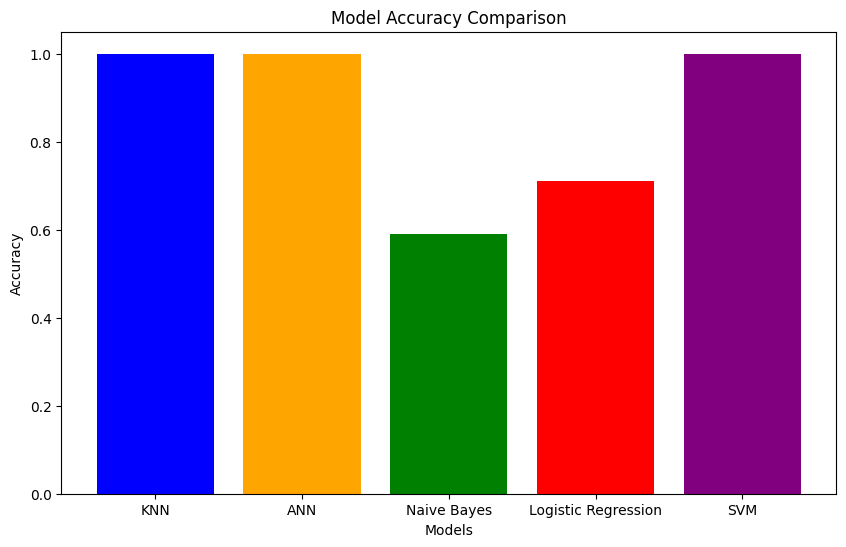

In [10]:
import matplotlib.pyplot as plt

# List of models
models = ['KNN', 'ANN', 'Naive Bayes', 'Logistic Regression', 'SVM']

# List of colors for each model
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Accuracy scores for each model (you can replace these with your actual accuracy scores)
accuracy_scores = [1.0, 1.0, 0.59, 0.71, 1.0]

# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=colors)

# Adding title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Displaying the bar graph
plt.show()